# API 資料串接 - 以 Dcard API 實作範例

* 利用 urllib 套件的 urlretrieve 方法下載檔案
* 了解 Python File I/O 讀檔、寫檔的用法
* 能用運用資源管理器 With Statement 優化寫法

## 作業目標

* 請利用 API: https://www.dcard.tw/_api/forums/pet/posts?popular=true 回答下列問題：

1. 這個 API 一次會回傳幾筆資料？每一筆資料包含哪些欄位？
2. 取出每一筆資料的「標題」、「貼文時間」、「留言人數」、「按讚人數」
3. 計算熱門/非熱門文章的「平均留言人數」與「平均按讚人數」

In [45]:
import requests
import json
from statistics import mean 
import matplotlib.pyplot as plt
import numpy as np

In [38]:
url_popular = 'https://www.dcard.tw/_api/forums/pet/posts?popular=true'
url_non_popular = 'https://www.dcard.tw/_api/forums/pet/posts?popular=false'
r_popular = requests.get(url_popular)
r_non_popular = requests.get(url_non_popular)
data_popular =json.loads(r_popular.text)
data_non_popular = json.loads(r_non_popular.text)

In [39]:
# 1. 這個 API 一次會回傳幾筆資料？每一筆資料包含哪些欄位？

def data_num_col(data):
    data_num = len(data)
    column =[]
    for key, value in data[0].items() :
        column.append(key)
    print('資料筆數 '+str(data_num), '，欄位 '+str(column))

data_num_col(data_popular)

資料筆數 30 ，欄位 ['id', 'title', 'excerpt', 'anonymousSchool', 'anonymousDepartment', 'pinned', 'forumId', 'replyId', 'createdAt', 'updatedAt', 'commentCount', 'likeCount', 'withNickname', 'tags', 'topics', 'meta', 'forumName', 'forumAlias', 'gender', 'school', 'department', 'replyTitle', 'mediaMeta', 'reactions', 'hidden', 'customStyle', 'isSuspiciousAccount', 'layout', 'withImages', 'withVideos', 'media', 'reportReasonText', 'postAvatar']


In [40]:
# 2. 取出每一筆資料的「標題」、「貼文時間」、「留言人數」、「按讚人數」

def data_info(data):
    data_info =[]

    for i in range(len(data)):
        vars()['n'+str(i)] = [data[i]['title'], data[i]['createdAt'], data[i]['commentCount'], data[i]['likeCount']]
        data_info.append(vars()['n'+str(i)])
    return data_info

data_info(data_popular)

[['#更。不要被薩摩耶給騙了！', '2019-11-29T00:25:38.826Z', 88, 4102],
 ['充滿柴柴的人生❤️', '2019-11-28T07:19:45.391Z', 25, 778],
 ['#圖多 偷看🐹上廁所......', '2019-11-28T13:44:17.224Z', 24, 776],
 ['請問這樣算不算虐貓', '2019-11-28T09:04:40.825Z', 86, 762],
 ['兄弟貓\U0001f9d0', '2019-11-28T12:25:11.285Z', 12, 263],
 ['#圖 柴柴 你能懂我的明白嗎？', '2019-11-28T16:22:31.895Z', 8, 178],
 ['沒有責任感根本沒資格養寵物', '2019-11-28T11:47:21.176Z', 20, 162],
 ['紙袋破壞王🏆', '2019-11-28T09:43:33.709Z', 4, 114],
 ['我竟然被我家ㄉ狗鄙視！', '2019-11-28T16:51:07.018Z', 4, 71],
 ['🐰誰說兔子不能碰水！兔子❤️海灘', '2019-11-29T07:34:46.328Z', 9, 58],
 ['天冷怎麼辦ಥ_ಥ #柯基#圖多', '2019-11-28T15:47:50.708Z', 0, 57],
 ['貓咪教妳皮笑肉不笑🙂', '2019-11-28T11:55:17.571Z', 2, 48],
 ['#貓 #圖 我懷疑我家貓咪根本不覺得自己是貓咪', '2019-11-29T15:01:23.745Z', 7, 40],
 ['#募款 #貓 愛在街角，守護浪貓', '2019-11-28T07:11:04.741Z', 1, 33],
 ['吸貓治百病', '2019-11-29T06:53:05.300Z', 3, 31],
 ['你也知道要坐那', '2019-11-28T17:00:22.755Z', 3, 31],
 ['就是你！！！我的菜！！！', '2019-11-29T03:10:51.060Z', 0, 28],
 ['我養了一隻樹懶\U0001f9a5', '2019-11-28T12:18:21.317Z', 6, 25],
 ['

熱門文章
average comment count:  11.033  average like count:  257.267

非熱門文章
average comment count:  3.567  average like count:  7.3


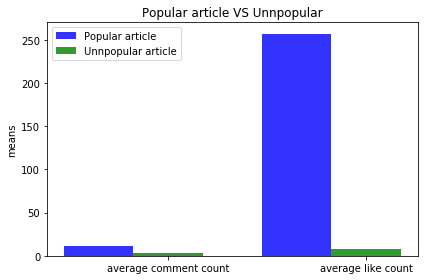

In [51]:
# 3. 計算熱門/非熱門文章的「平均留言人數」與「平均按讚人數」

def data_count(data):
    commentCount =[]
    likeCount =[]

    for i in range(len(data)):
        vars()['c'+str(i)] = data[i]['commentCount']
        vars()['l'+str(i)] = data[i]["likeCount"]
        commentCount.append(vars()['c'+str(i)])
        likeCount.append(vars()['l'+str(i)])
        avg_comment = round(mean(commentCount), 3)
        avg_like =round(mean(likeCount), 3)
    return (avg_comment, avg_like)

mean_popular = (11.033, 257.267)
mean_non_popular =data_count(data_non_popular)
print('熱門文章')
print('average comment count: ', data_count(data_popular)[0], ' average like count: ', data_count(data_popular)[1])
print( )
print('非熱門文章')
print('average comment count: ', data_count(data_non_popular)[0], ' average like count: ', data_count(data_non_popular)[1])

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, mean_popular, bar_width,
alpha=opacity,
color='b',
label='Popular article')

rects2 = plt.bar(index + bar_width, mean_non_popular, bar_width,
alpha=opacity,
color='g',
label='Unnpopular article')

plt.ylabel('means')
plt.title('Popular article VS Unnpopular')
plt.xticks(index + bar_width, ('average comment count', 'average like count'))
plt.legend()

plt.tight_layout()
plt.show()